## Introduction to Programming for Artificial Intelligence and Data Science
  **Assignment: Customer Data Pre-processing**
  
  **Oyinade Akintoye, 202131057**

## Default libraries and package import
This cell contains the list of all python librabries imported and used for this assignment.
- Standard library used are: csv,json,os,datetime,relativedelta
- High level library used are: pandas, seaborn

In [1]:
import csv
import json
import os
import datetime
from dateutil import relativedelta
import pandas as pd
import seaborn as sns

## Task 1
*Read the ACW Data using the CSV library*

In [2]:
with open ('acw_user_data.csv', 'r') as acw_file: #read the CSV file using a context manager
    customer_records = csv.reader(acw_file, delimiter=',')

## Task 2 
*Convert all flat structures to nested structures - (Vehicle, Credit Card and Address)*
#### Function Documentation (1 of 6) : nest_customer_info
This function collects customer information with column value as key and empty dictionary as value and returns a nested dictionary list for each customer record.
This function uses an array of customer_records to return a nested list by passing in values of the header column values in a dictionary

In [3]:
#open the file in read mode and make a list of lists for vehicle
with open ('acw_user_data.csv','r') as acw_file:
    customer_records = csv.reader(acw_file, delimiter=',')
    
#convert CSV file to a list
    nested_list = list(customer_records)

#creating function to nest data. 
    def nest_customer_info(header_values):     #{19: 'address', 20: 'city', 21: 'postcode'}
        row_value = 0
        nested_customer_info = {}
            
#this goes through the csv as a list to return the nested data
        for row in nested_list:
        
#this is to access the first header data from the csv list
            if row_value == 0 :

#creating a empty dictionary to nest the header to the corresponding data
                for column, info in header_values.items():
                    nested_customer_info[row[column]] = {}

#this will access the rest of the data in the csv list
            else: 
        
#this is to nest the individual header to the corresponding data
                for column, info in header_values.items():
                    nested_customer_info[nested_list[0][column]][row_value] = row[column]
            
#incrementing the keys in the individual data of each headers                    
            row_value += 1
            
        return nested_customer_info
    
#this shows the output of the nested data for each customer information  
    vehicle = nest_customer_info({19: {}, 20: {}, 21: {}, 22: {}})
    credit_card = nest_customer_info({6: {}, 7: {}, 8: {}, 9:{}, 12: {}})
    address = nest_customer_info({0: {}, 1: {}, 2: {}})

## Task 3
1. *Replacing empty records ("" , " ") in Dependants column with a resonable value*
2. *Print a list of error occurence in the Dependants*

In [4]:
with open('acw_user_data.csv', 'r') as acw_file:
    customer_records = csv.reader(acw_file, delimiter=',')
    count = 0 #set count to zero
    error_list = [] #create empty list for empty records
    
    for dependant in customer_records: #checking each row in the data
        count = count + 1
        
        if dependant[10] == "" or dependant[10] == " ": #checking for empty record in the dependant column
            dependant[10] = 0 #assign count to empty record
            error_list.append(count) #add position of empty dependant record to empty list
    
    print('Problematic rows for dependants:', error_list)
    print('Total no of Problematic rows for dependants:',len(error_list))

Problematic rows for dependants: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]
Total no of Problematic rows for dependants: 19


## Task 4
*Write all records to a processed.json file*

#### Function Documentation (2 of 6) : create_subdirectory_remove_duplicate_header
This function nest headers and removes existing headers by passing in each row and the coressponding headers that needs to be removed and nested.

In [5]:
#opened and used the csv reader called DictReader to read the csv acw_user_data file
with open('acw_user_data.csv', mode='r') as acw_file:
    customer_records = csv.DictReader(acw_file)
    processed_data = [] #empty list to capture the processed records
    title = ['Address Street','Address City','Address Postcode','Credit Card Start Date',
         'Credit Card Expiry Date','Credit Card Number', 'Credit Card CVV','Bank IBAN',
        'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'] #list of headers 

#to create a dictionary using the row and headers for a sub-dictionary
    def create_subdirectory_remove_duplicate_header(row, headers): 
        sub_data = {}
        
        for header in headers:
            sub_data[header] = row[header]
            row.pop(header)
        
        return sub_data
    
    for row in customer_records: #accessing customer records       
        address = create_subdirectory_remove_duplicate_header(row,['Address Street','Address City','Address Postcode'])
        credit_card = create_subdirectory_remove_duplicate_header(row,['Credit Card Start Date','Credit Card Expiry Date',
                                                 'Credit Card Number', 'Credit Card CVV','Bank IBAN'])
        vehicle = create_subdirectory_remove_duplicate_header(row,['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'])
        
        row['Address'] = address #creating a sub-dictionary for address
        row['Credit card'] = credit_card #creating a sub-dictionary for credit card
        row['Vehicle'] = vehicle #creating a sub-dictionary for vehicle
        
        processed_data.append(row) #add each customer data to a list
        
#writing the csv file using the json.dump function
with open('processed.json', mode='w') as final_data:
    json.dump(processed_data, final_data)

#loading the data into the json file
with open('processed.json', mode='r') as processed_data:
    (json.load(processed_data))

## Task 5 
**Create two additional file outputs:**
- Retired.json 
    
- Employed.json for all retired and employed customers

#### Function Documentation (3 of 6) : filtered_by_status
The function returns a list based on the employee status using the status and the values set for the status as parameters

#### Function Documentation (4 of 6) : outputs_json
This function creates a json file by colecting the file name and the data that he file will contain

#### Function Documentation (5 of 6) : read_json
This function reads the data in a file using the file name as a parameter

In [6]:
with open('processed.json', mode='r') as processed_data:
    processed = json.load(processed_data)
    
#function to get employee data by status and set value
    def filtered_by_status(status, set_value):
        final_list = []    
    
        for customer in processed: #accessing processed customer record
            if customer[status] != set_value:
                final_list.append(customer) #add customer record when status is not true
            
        return final_list

    all_retired = filtered_by_status('Retired', 'False') #the data for retired employees
    employed = filtered_by_status('Employer Company', 'N/A') #data for employed employees

#function to write a file
def outputs_json(file_name, file_data):
    with open(file_name, mode='w') as final_data:
        json.dump(file_data, final_data)
    
retired_file = outputs_json('retired.json', all_retired) #create retired file
employed_file = outputs_json('employed.json', employed) ##create employed file

#function to read the new json files
def read_json(file_name):
    with open(file_name, mode='r') as processed_data:
        (json.load(processed_data))
        
read_json('retired.json')
read_json('employed.json')

## Task 6 
*Create a function to filter customers that have more than 10 years between their start and end date to remove_ccard.json file*

The function to calculate the differnce in years betwen two dates for start year and expiry year. Reference: https://www.adamsmith.haus/python/answers/how-to-calculate-the-difference-in-years-between-two-dates-in-python

#### Function Documentation (6 of 6) : check_credit_card_entries
This function collects a customer parameter and uses the credit card dates to calculate the year difference to check if a customer credit card validity is >10 years by returning a boolean.

In [7]:
#demo data from customer records
customer = {'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Dependants': '3', 
              'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 
              'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 
              'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 
              'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/50', 'Credit Card Number': '676373692463', 
                              'Credit Card CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571',
              'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
customer_a = {'Age (Years)': '67', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Dependants': '1',
               'First Name': 'Clive', 'Last Name': 'Evans', 'Marital Status': 'single', 'Yearly Pension (GBP)': '28075', 
               'Retired': 'True', 'Yearly Salary (GBP)': '27964', 'Sex': 'Male','Address Street': '81 Goodwin dam', 
               'Address City': 'Griffinstad', 'Address Postcode': 'G3 7ZX', 'Credit Card Start Date': '07/15',
               'Credit Card Expiry Date': '04/62', 'Credit Card Number': '213199489183130', 'Credit Card CVV': '389', 
               'Bank IBAN': 'GB04VSAZ69128049616822','Vehicle Make': 'Volvo', 'Vehicle Model': 'Express 3500 Passenger', 
               'Vehicle Year': '2013', 'Vehicle Type': 'SUV'}
error_message = 'Customer credit card entry is less than 10 years!'
    
#function to get a customer who has more than 10 years between their credit card start date and expiry date
def check_credit_card_entries(customer):
        
#getting the exact values for month and year
    start_date_month = customer['Credit Card Start Date'][:2]
    start_date_year = customer['Credit Card Start Date'][3:]
    expiry_date_month = customer['Credit Card Expiry Date'][:2]
    expiry_date_year = customer['Credit Card Expiry Date'][3:]    

#using datetime function to get start and expiry date in date format
    start_date = datetime.datetime(int(start_date_year),int(start_date_month),1)
    expiry_date = datetime.datetime(int(expiry_date_year),int(expiry_date_month),1)

#using relativedelta function to get time interval
    date_difference = relativedelta.relativedelta(expiry_date, start_date)
    year_difference = date_difference.years

    if year_difference > 10:
        return True
    else: 
        return False

#create a remove_ccard.json file
if not os.path.exists('remove_ccard.json'):
    with open ('remove_ccard.json', 'w') as acw_final_data:
        json.dump([customer], acw_final_data)
        
#this reads and update the file        
with open('remove_ccard.json', 'r+') as file:
    try: #this reads the file and updates it for customers with more than 10years difference and shows an error if <10years
        if check_credit_card_entries(customer):
            file_data = json.load(file)
            file_data.append(customer_a)
            file.seek(0)
            json.dump(file_data, file)
    except:
        (error_message)

with open('remove_ccard.json', mode='r') as processed_data:
    (json.load(processed_data))

## Task 7
*Create a new data attribute for our customers called “Salary-Commute" using Salary and Commute distance to work*

In [8]:
with open('processed.json', mode='r') as processed_data:
    processed = json.load(processed_data)
 
    #accessing data in processed file
    for customer in processed:
        miles = float(customer['Distance Commuted to Work (miles)']) #convert miles value from string to float
        salary = int(customer['Yearly Salary (GBP)']) #convert salary value from string to integer
        
        if miles <= 1:
            customer['Salary-Commute']= str(salary) #setting salary-commute per miles < 1 to the actual salary
        else:
            salary_per_mile = salary/miles #calculating salary per mile
            customer['Salary-Commute'] = str(salary_per_mile) #setting salary per mile

    #Sort records of the new metric in ascending order
    sort_by_salarycommute = sorted(processed, key=lambda x:x['Salary-Commute'])
    
#store the output as a json format
with open ('commute.json', 'w') as commute_data: 
        json.dump(sort_by_salarycommute, commute_data )

## Data Visualization 
#### Task 1. Obtaining data series, mean, median for: 
- Age
- Salary

In [9]:
#load dataframe
df = pd.read_csv('acw_user_data.csv')

#Task 1a - Obtaining the data series for Salary
salary = df['Yearly Salary (GBP)']

#calculating mean and median of salary of customers
print('Customer Salary Mean:', salary.mean())
print('Customer Salary Median:', salary.median())

#Task 1b - Obtaining the data series for Age, 
age = df['Age (Years)']

#calculating Age Mean and Age Median of customers
print('Customer Age Mean:', age.mean())
print('Customer Age Median:', age.median())

Customer Salary Mean: 57814.078
Customer Salary Median: 57518.0
Customer Age Mean: 54.302
Customer Age Median: 54.0


### Task 2 - 4
   - **Univariate plots** (Age, Dependants and Marital Status)

   - **Multivariate plots** (Commute distance against salary, Age against Salary condition on Marital Status
   
   - **A cell that saves all plots produced**
   
   Additional features used to enhance data visulization. Reference: https://www.sharpsightlabs.com/blog/seaborn-histogram/
   
### Task 2 - Univariate Plots

##### Task 2b - the missing data is fixed using median because:
1. The dependant data is numerical 
2. sns.boxplot(df['Dependants']) shows the data as skewed to the right. When the data is skewed, it is good to consider using the median value for replacing the missing values. 

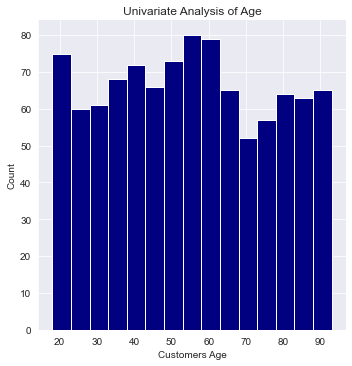

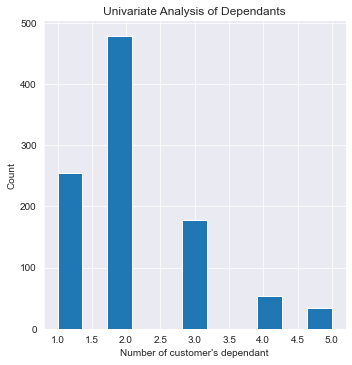

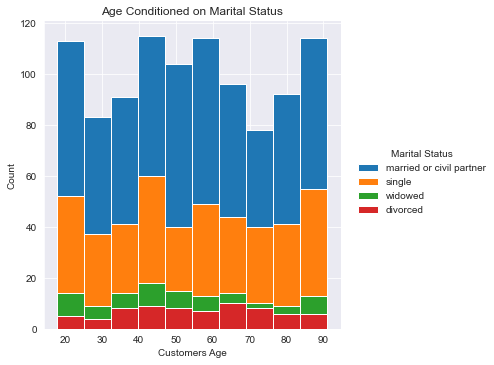

In [10]:
df = pd.read_csv('acw_user_data.csv')
sns.set_style('darkgrid')

#Task 2a - Univariate plot of Age, calculating how many bins would be required for a bin_width of 5

#Age bins calculation with bins_width given as 5
max_age = max(age)
min_age = min(age)
bins_width_age = 5
calc_bins_age = (max_age - min_age) / bins_width_age

#Univariate plot of Age
Age_plt = sns.displot(df, x = age, bins = calc_bins_age, binwidth = 5, color = 'navy', alpha = 1).set(title = 'Univariate Analysis of Age')
# add label to the axis and label to the age plot
Age_plt.set(xlabel ="Customers Age", ylabel = "Count")

#Task 2b: Univariate plot of Dependents, fixing data errors with seaborn itself.
Dependant_median_value = int(df['Dependants'].median()) 
df['Dependants'].fillna(Dependant_median_value, inplace=True) #replace missing values with median
Dependant_plt = sns.displot(df, x='Dependants', alpha = 1).set(title='Univariate Analysis of Dependants')
Dependant_plt.set(xlabel ="Number of customer's dependant", ylabel = "Count")

#Task 2c: Univariate plot of Age (of default bins), conditioned on Marital Status
AgeconMar_plt = sns.displot(df, x = age, hue='Marital Status', multiple='stack', bins = 10, alpha = 1).set(title='Age Conditioned on Marital Status')
AgeconMar_plt.set(xlabel ="Customers Age", ylabel = "Count")

#### Task 3 - Multivariate Plots

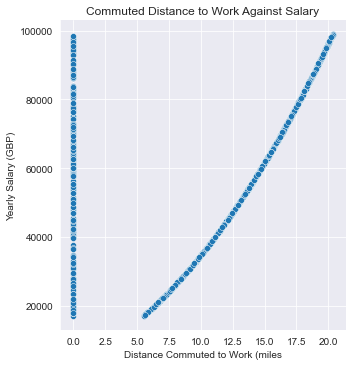

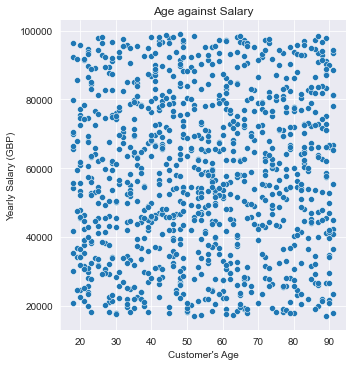

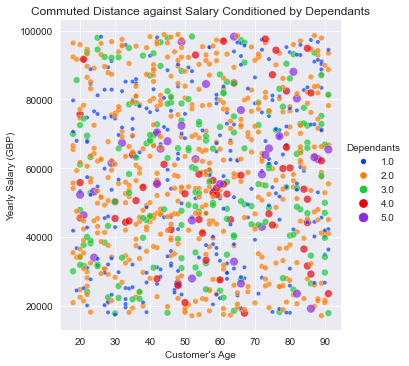

In [11]:
#Task 3a: Multivariate plot of commuted distance against salary
ComDistSal_plt = sns.relplot(df, x='Distance Commuted to Work (miles)', y = salary).set(title='Commuted Distance to Work Against Salary')
ComDistSal_plt.set(xlabel = 'Distance Commuted to Work (miles', ylabel = 'Yearly Salary (GBP)')

#Task 3b: Multivariate plot of age against salary
AgeSalary_plt = sns.relplot(df, x=age, y=salary).set(title='Age against Salary')
AgeSalary_plt.set(xlabel = "Customer's Age", ylabel = "Yearly Salary (GBP)")

#Task 3c: Multivariate plot of commuted distance against salary conditioned by dependants
ComDistSal_con_Dep_plt = sns.relplot(df, x=age, y=salary, hue='Dependants', size='Dependants', palette = 'bright', alpha = .7).set(title='Commuted Distance against Salary Conditioned by Dependants')
ComDistSal_con_Dep_plt.set(xlabel = "Customer's Age", ylabel = 'Yearly Salary (GBP)')


#### Task 4 - Save all images of plots produced

In [12]:
plots_produced = {} #empty dictionary

#save the seaborn plots as a png file
plots_produced["./customers_age.png"] = Age_plt
plots_produced["./customers_dependants.png"] = Dependant_plt
plots_produced["./customer_con_maritalstatus.png"] = AgeconMar_plt
plots_produced["./commdistance_salary.png"] = ComDistSal_plt
plots_produced["./age_salary.png"] = AgeSalary_plt
plots_produced["./commdistance_con_dependants.png"] = ComDistSal_con_Dep_plt

plots_produced

for png, obj in plots_produced.items():
    obj.savefig(png)